<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span><ul class="toc-item"><li><span><a href="#Загрузка-и-предоработка" data-toc-modified-id="Загрузка-и-предоработка-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Загрузка и предоработка</a></span></li><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Подготовка данных</a></span></li><li><span><a href="#Разница-выборок" data-toc-modified-id="Разница-выборок-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Разница выборок</a></span></li></ul></li><li><span><a href="#Анализ-данных" data-toc-modified-id="Анализ-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Анализ данных</a></span><ul class="toc-item"><li><span><a href="#Анализ-концентрации-металлов" data-toc-modified-id="Анализ-концентрации-металлов-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Анализ концентрации металлов</a></span></li><li><span><a href="#Сравнение-распределения-размеров-гранул-сырья" data-toc-modified-id="Сравнение-распределения-размеров-гранул-сырья-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Сравнение распределения размеров гранул сырья</a></span></li><li><span><a href="#Суммарная-концентрация-всех-веществ" data-toc-modified-id="Суммарная-концентрация-всех-веществ-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Суммарная концентрация всех веществ</a></span></li></ul></li><li><span><a href="#Модель" data-toc-modified-id="Модель-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Модель</a></span><ul class="toc-item"><li><span><a href="#Функция-для-подсчета-sMAPE" data-toc-modified-id="Функция-для-подсчета-sMAPE-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Функция для подсчета sMAPE</a></span></li><li><span><a href="#Обучение-моделей" data-toc-modified-id="Обучение-моделей-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Обучение моделей</a></span></li></ul></li><li><span><a href="#Выводы" data-toc-modified-id="Выводы-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Выводы</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Восстановление золота из руды

Подготовьте прототип модели машинного обучения для «Цифры». Компания разрабатывает решения для эффективной работы промышленных предприятий.

Модель должна предсказать коэффициент восстановления золота из золотосодержащей руды. Используйте данные с параметрами добычи и очистки. 

Модель поможет оптимизировать производство, чтобы не запускать предприятие с убыточными характеристиками.

Вам нужно:

1. Подготовить данные;
2. Провести исследовательский анализ данных;
3. Построить и обучить модель.

Чтобы выполнить проект, обращайтесь к библиотекам *pandas*, *matplotlib* и *sklearn.* Вам поможет их документация.

## Подготовка данных

### Загрузка и предоработка

In [1]:
import pandas as pd
import numpy as np
import re
from scipy import stats as st
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from IPython.display import display
from numpy.random import RandomState
from scipy import stats
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LinearRegression, ElasticNet, Ridge, Lasso
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from catboost import CatBoostRegressor
from sklearn.dummy import DummyRegressor
from sklearn.metrics import mean_squared_error, make_scorer

In [2]:
df_train = pd.read_csv('/datasets/gold_recovery_train_new.csv')
df_test = pd.read_csv('/datasets/gold_recovery_test_new.csv')
df_full = pd.read_csv('/datasets/gold_recovery_full_new.csv')

In [3]:
df_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19439 entries, 0 to 19438
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                19439 non-null  object 
 1   final.output.concentrate_ag                         19438 non-null  float64
 2   final.output.concentrate_pb                         19438 non-null  float64
 3   final.output.concentrate_sol                        19228 non-null  float64
 4   final.output.concentrate_au                         19439 non-null  float64
 5   final.output.recovery                               19439 non-null  float64
 6   final.output.tail_ag                                19438 non-null  float64
 7   final.output.tail_pb                                19338 non-null  float64
 8   final.output.tail_sol                               19433 non-null  float64


In [4]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5290 entries, 0 to 5289
Data columns (total 53 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   date                                        5290 non-null   object 
 1   primary_cleaner.input.sulfate               5286 non-null   float64
 2   primary_cleaner.input.depressant            5285 non-null   float64
 3   primary_cleaner.input.feed_size             5290 non-null   float64
 4   primary_cleaner.input.xanthate              5286 non-null   float64
 5   primary_cleaner.state.floatbank8_a_air      5290 non-null   float64
 6   primary_cleaner.state.floatbank8_a_level    5290 non-null   float64
 7   primary_cleaner.state.floatbank8_b_air      5290 non-null   float64
 8   primary_cleaner.state.floatbank8_b_level    5290 non-null   float64
 9   primary_cleaner.state.floatbank8_c_air      5290 non-null   float64
 10  primary_clea

In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14149 entries, 0 to 14148
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                14149 non-null  object 
 1   final.output.concentrate_ag                         14148 non-null  float64
 2   final.output.concentrate_pb                         14148 non-null  float64
 3   final.output.concentrate_sol                        13938 non-null  float64
 4   final.output.concentrate_au                         14149 non-null  float64
 5   final.output.recovery                               14149 non-null  float64
 6   final.output.tail_ag                                14149 non-null  float64
 7   final.output.tail_pb                                14049 non-null  float64
 8   final.output.tail_sol                               14144 non-null  float64


In [6]:
print(df_train.duplicated().sum())
print(df_test.duplicated().sum())
print(df_full.duplicated().sum())

0
0
0


In [7]:
print(df_train.isna().sum().sort_values().tail(10))
print(df_test.isna().sum().sort_values().tail(10))
print(df_full.isna().sum().sort_values().tail(10))

primary_cleaner.input.xanthate               100
rougher.input.feed_pb                        100
final.output.tail_pb                         100
rougher.input.feed_size                      144
final.output.concentrate_sol                 211
secondary_cleaner.state.floatbank2_a_air     217
primary_cleaner.output.concentrate_sol       286
rougher.input.floatbank11_xanthate           428
rougher.state.floatbank10_e_air              436
secondary_cleaner.output.tail_sol           1605
dtype: int64
rougher.input.feed_rate                      3
secondary_cleaner.state.floatbank2_a_air     3
primary_cleaner.input.xanthate               4
primary_cleaner.input.sulfate                4
rougher.input.floatbank10_sulfate            5
primary_cleaner.input.depressant             5
rougher.input.floatbank11_sulfate            8
secondary_cleaner.state.floatbank3_a_air     9
rougher.input.feed_sol                      21
rougher.input.floatbank11_xanthate          25
dtype: int64
final.output.t

In [8]:
display(df_train.head(10))
display(df_test.head(10))
display(df_full.head(10))

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691
5,2016-01-15 05:00:00,6.482968,10.049416,5.480257,41.633678,69.465816,10.182708,0.664118,16.999638,1.918586,...,13.938497,-500.970168,11.883350,-500.395298,10.054147,-496.374715,7.965083,-499.364752,14.017067,-599.707915
6,2016-01-15 06:00:00,6.533849,10.058141,4.569100,41.995316,69.300835,10.304598,0.807342,16.723575,2.058913,...,14.046819,-500.971133,12.091543,-500.501426,10.003247,-497.083180,8.010890,-500.002423,14.029649,-600.905470
7,2016-01-15 07:00:00,6.130823,9.935481,4.389813,42.452727,70.230976,10.443288,0.949346,16.689959,2.143437,...,13.974691,-501.819696,12.101324,-500.583446,9.873169,-499.171928,7.993381,-499.794518,13.984498,-600.411070
8,2016-01-15 08:00:00,5.834140,10.071156,4.876389,43.404078,69.688595,10.420140,1.065453,17.201948,2.209881,...,13.964030,-504.252450,12.060738,-501.174549,10.033838,-501.178133,7.881604,-499.729434,13.967135,-599.061188
9,2016-01-15 09:00:00,5.687063,9.980404,5.282514,43.235220,70.279619,10.487013,1.159805,17.483979,2.209593,...,13.989632,-503.195299,12.052233,-500.928547,9.962574,-502.986357,7.979219,-500.146835,13.981614,-598.070855


,date,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-09-01 00:59:59,210.800909,14.993118,8.080000,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,...,12.023554,-497.795834,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414
1,2016-09-01 01:59:59,215.392455,14.987471,8.080000,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,...,12.058140,-498.695773,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438
2,2016-09-01 02:59:59,215.259946,12.884934,7.786667,0.996043,1398.493666,-500.868360,1398.860436,-499.764529,1398.075709,...,11.962366,-498.767484,8.096893,-500.827423,8.071056,-500.801673,4.905125,-499.828510,24.994862,-500.622559
3,2016-09-01 03:59:59,215.336236,12.006805,7.640000,0.863514,1399.618111,-498.863574,1397.440120,-499.211024,1400.129303,...,12.033091,-498.350935,8.074946,-499.474407,7.897085,-500.868509,4.931400,-499.963623,24.948919,-498.709987
4,2016-09-01 04:59:59,199.099327,10.682530,7.530000,0.805575,1401.268123,-500.808305,1398.128818,-499.504543,1402.172226,...,12.025367,-500.786497,8.054678,-500.397500,8.107890,-509.526725,4.957674,-500.360026,25.003331,-500.856333
5,2016-09-01 05:59:59,168.485085,8.817007,7.420000,0.791191,1402.826803,-499.299521,1401.511119,-499.205357,1404.088107,...,12.029797,-499.814895,8.036586,-500.371492,8.041446,-510.037054,4.983949,-499.990990,24.978973,-500.475640
6,2016-09-01 06:59:59,144.133440,7.924610,7.420000,0.788838,1398.252401,-499.748672,1393.255503,-499.195380,1396.738566,...,12.026296,-499.473127,8.027984,-500.983079,7.907340,-507.964971,5.010224,-500.043697,25.040709,-499.501984
7,2016-09-01 07:59:59,133.513396,8.055252,6.988000,0.801871,1401.669677,-501.777839,1400.754446,-502.514024,1400.465244,...,12.040911,-501.293852,8.020490,-499.185229,8.116897,-511.927561,5.036498,-500.149615,25.032580,-503.970657
8,2016-09-01 08:59:59,133.735356,7.999618,6.935000,0.789329,1402.358981,-499.981597,1400.985954,-496.802968,1401.168584,...,11.998184,-499.481608,8.012610,-500.896783,7.974422,-521.199104,5.061599,-499.791519,25.005063,-497.613716
9,2016-09-01 09:59:59,126.961069,8.017856,7.030000,0.805298,1400.816120,-499.014158,1399.975401,-499.570552,1401.871924,...,12.040725,-499.987743,7.989503,-499.750625,7.989710,-509.946737,5.068811,-499.293900,24.992741,-499.272255


,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691
5,2016-01-15 05:00:00,6.482968,10.049416,5.480257,41.633678,69.465816,10.182708,0.664118,16.999638,1.918586,...,13.938497,-500.970168,11.883350,-500.395298,10.054147,-496.374715,7.965083,-499.364752,14.017067,-599.707915
6,2016-01-15 06:00:00,6.533849,10.058141,4.569100,41.995316,69.300835,10.304598,0.807342,16.723575,2.058913,...,14.046819,-500.971133,12.091543,-500.501426,10.003247,-497.083180,8.010890,-500.002423,14.029649,-600.905470
7,2016-01-15 07:00:00,6.130823,9.935481,4.389813,42.452727,70.230976,10.443288,0.949346,16.689959,2.143437,...,13.974691,-501.819696,12.101324,-500.583446,9.873169,-499.171928,7.993381,-499.794518,13.984498,-600.411070
8,2016-01-15 08:00:00,5.834140,10.071156,4.876389,43.404078,69.688595,10.420140,1.065453,17.201948,2.209881,...,13.964030,-504.252450,12.060738,-501.174549,10.033838,-501.178133,7.881604,-499.729434,13.967135,-599.061188
9,2016-01-15 09:00:00,5.687063,9.980404,5.282514,43.235220,70.279619,10.487013,1.159805,17.483979,2.209593,...,13.989632,-503.195299,12.052233,-500.928547,9.962574,-502.986357,7.979219,-500.146835,13.981614,-598.070855


Данные загружены и изучены. Дубликатов нет. Пропуски есть, но мы не знаем их природу. Изучив пропуски, можно сделать вывод что бОльшая их часть связана с остатками соли. 

Заменим пропуски усредненным значением по соседним данным, используя метод "ffill".

In [9]:
df_full = df_full.fillna(method='ffill')
df_train = df_train.fillna(method='ffill')
df_test = df_test.fillna(method='ffill')

In [10]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5290 entries, 0 to 5289
Data columns (total 53 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   date                                        5290 non-null   object 
 1   primary_cleaner.input.sulfate               5290 non-null   float64
 2   primary_cleaner.input.depressant            5290 non-null   float64
 3   primary_cleaner.input.feed_size             5290 non-null   float64
 4   primary_cleaner.input.xanthate              5290 non-null   float64
 5   primary_cleaner.state.floatbank8_a_air      5290 non-null   float64
 6   primary_cleaner.state.floatbank8_a_level    5290 non-null   float64
 7   primary_cleaner.state.floatbank8_b_air      5290 non-null   float64
 8   primary_cleaner.state.floatbank8_b_level    5290 non-null   float64
 9   primary_cleaner.state.floatbank8_c_air      5290 non-null   float64
 10  primary_clea

In [11]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14149 entries, 0 to 14148
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                14149 non-null  object 
 1   final.output.concentrate_ag                         14149 non-null  float64
 2   final.output.concentrate_pb                         14149 non-null  float64
 3   final.output.concentrate_sol                        14149 non-null  float64
 4   final.output.concentrate_au                         14149 non-null  float64
 5   final.output.recovery                               14149 non-null  float64
 6   final.output.tail_ag                                14149 non-null  float64
 7   final.output.tail_pb                                14149 non-null  float64
 8   final.output.tail_sol                               14149 non-null  float64


In [12]:
df_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19439 entries, 0 to 19438
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                19439 non-null  object 
 1   final.output.concentrate_ag                         19439 non-null  float64
 2   final.output.concentrate_pb                         19439 non-null  float64
 3   final.output.concentrate_sol                        19439 non-null  float64
 4   final.output.concentrate_au                         19439 non-null  float64
 5   final.output.recovery                               19439 non-null  float64
 6   final.output.tail_ag                                19439 non-null  float64
 7   final.output.tail_pb                                19439 non-null  float64
 8   final.output.tail_sol                               19439 non-null  float64


Пропуски заполнены, можно двигаться дальше.

### Подготовка данных

Проверка расчета эффективности обогащения.

Мы имеем формулу расчета эффективности обогащения:

recovery = (C*(F-T)) / (F*(C-T)) * 100%

Где:
- C — доля золота в концентрате после флотации/очистки; rougher.output.concentrate_au
- F — доля золота в сырье/концентрате до флотации/очистки; rougher.input.feed_au
- T — доля золота в отвальных хвостах после флотации/очистки. rougher.output.tail_au 

Создадим функцию, которая будет высчитывать эффективность обогащения:

In [13]:
def recovery_eff(C, F, T):
    recovery = 100*((C*(F-T))/(F*(C-T)))
    return recovery

Эффективность обогащения нужно вычислить на обучающей выборке для признака rougher.output.recovery. После чего необходимо найтие МАЕ между расчетами и значениями признака. 
Для использования и проверки функции создадим новый набор данных с нужными признаками для тестирования. 

In [14]:
df_train_def = df_train[['rougher.output.concentrate_au',  'rougher.input.feed_au', 'rougher.output.tail_au', 'rougher.output.recovery']].dropna(axis = 0)
df_train_def.head()

,rougher.output.concentrate_au,rougher.input.feed_au,rougher.output.tail_au,rougher.output.recovery
0,19.793808,6.486150,1.170244,87.107763
1,20.050975,6.478583,1.184827,86.843261
2,19.737170,6.362222,1.162562,86.842308
3,19.320810,6.118189,1.079755,87.226430
4,19.216101,5.663707,1.012642,86.688794


In [15]:
df_train_def['recovery'] = recovery_eff(C = df_train_def['rougher.output.concentrate_au'],
                                        F = df_train_def['rougher.input.feed_au'],
                                        T = df_train_def['rougher.output.tail_au'])
df_train_def.head()

,rougher.output.concentrate_au,rougher.input.feed_au,rougher.output.tail_au,rougher.output.recovery,recovery
0,19.793808,6.486150,1.170244,87.107763,87.107763
1,20.050975,6.478583,1.184827,86.843261,86.843261
2,19.737170,6.362222,1.162562,86.842308,86.842308
3,19.320810,6.118189,1.079755,87.226430,87.226430
4,19.216101,5.663707,1.012642,86.688794,86.688794


Визуально видим соответствие значений последних двух столбцов. Проверим это расчетами. Найдем корреляцию и МАЕ.

In [16]:
df_train_def.corr()

,rougher.output.concentrate_au,rougher.input.feed_au,rougher.output.tail_au,rougher.output.recovery,recovery
rougher.output.concentrate_au,1.000000,0.216925,0.255713,0.556946,0.556946
rougher.input.feed_au,0.216925,1.000000,0.361630,0.156173,0.156173
rougher.output.tail_au,0.255713,0.361630,1.000000,-0.384512,-0.384512
rougher.output.recovery,0.556946,0.156173,-0.384512,1.000000,1.000000
recovery,0.556946,0.156173,-0.384512,1.000000,1.000000


In [17]:
mean_absolute_error(df_train_def['rougher.output.recovery'], df_train_def['recovery'])

9.73512347450521e-15

Показатели корреляции равны 1, что значит полное соответствие. МАЕ ~ 9.8е-15, что практически равно нулю, значит расчеты проведены верно. 

### Разница выборок  

Найдем признаки, которые не представлены в тестовой выборке. Используем способ преобразования множеств set().

In [18]:
df_test_out = list(set(df_train.columns.values.tolist())-set(df_test.columns.values.tolist()))
df_test_out

['rougher.output.tail_ag',
 'final.output.tail_pb',
 'rougher.output.concentrate_ag',
 'rougher.output.tail_sol',
 'rougher.output.concentrate_sol',
 'rougher.calculation.au_pb_ratio',
 'primary_cleaner.output.concentrate_pb',
 'rougher.output.concentrate_au',
 'final.output.tail_sol',
 'primary_cleaner.output.tail_au',
 'secondary_cleaner.output.tail_sol',
 'primary_cleaner.output.tail_ag',
 'primary_cleaner.output.tail_pb',
 'final.output.concentrate_au',
 'rougher.output.concentrate_pb',
 'rougher.output.recovery',
 'final.output.concentrate_pb',
 'rougher.output.tail_pb',
 'primary_cleaner.output.tail_sol',
 'final.output.tail_ag',
 'rougher.calculation.floatbank10_sulfate_to_au_feed',
 'secondary_cleaner.output.tail_au',
 'final.output.concentrate_sol',
 'secondary_cleaner.output.tail_pb',
 'final.output.tail_au',
 'primary_cleaner.output.concentrate_sol',
 'rougher.output.tail_au',
 'rougher.calculation.sulfate_to_au_concentrate',
 'rougher.calculation.floatbank11_sulfate_to_au_f

В тестовой выборке отсутствуют значения итоговых и промежуточных замеров и рассчётов.
Остаются показатели оборудования в процессе обработки и характеристики сырья на входе

Удалим из тренировочной выборки лишние признаки. Эти шаги я выполнить позже, перед обучением модели, так как удаление из тренировочной выборки данных о концентратах, которых нет в тестовой выборке - помешают вычислять выбросы в суммарных концентратах. 

In [19]:
# missing_cols = df_train.columns.drop(df_test.columns)
# cols_to_drop = missing_cols.drop(['final.output.recovery', 'rougher.output.recovery'])
# right_cols = df_train.columns.drop(cols_to_drop)
# df_train = df_train[right_cols]
# df_train.info()

Добавим в тестовую выборку таргеты, чтобы модели работали корректно. Это столбцы  'rougher.output.recovery' и 'final.output.recovery'.

In [20]:
# target_features_to_join = df_full[['date', 'final.output.recovery', 'rougher.output.recovery']].copy()
# df_test = df_test.join(target_features_to_join.set_index('date'), on='date')

In [21]:
#df_test.head()

In [22]:
#df_test.isna().sum()

В них были пропуски. Удалим их. 

In [23]:
# df_test = df_test.dropna()
# df_test.info()

## Анализ данных

### Анализ концентрации металлов

Нужно выяснить концентрацию металлов на разных этапах работы с рудой. Для этого создадим новый датафрейм с нужными нам параметрами и построим соответствующие графики.

In [24]:
concentrate = {'Серебро':['rougher.output.concentrate_ag', 'primary_cleaner.output.concentrate_ag', 'final.output.concentrate_ag' ],
               'Золото':['rougher.output.concentrate_au', 'primary_cleaner.output.concentrate_au', 'final.output.concentrate_au' ],
               'Свинец':['rougher.output.concentrate_pb', 'primary_cleaner.output.concentrate_pb', 'final.output.concentrate_pb' ]}

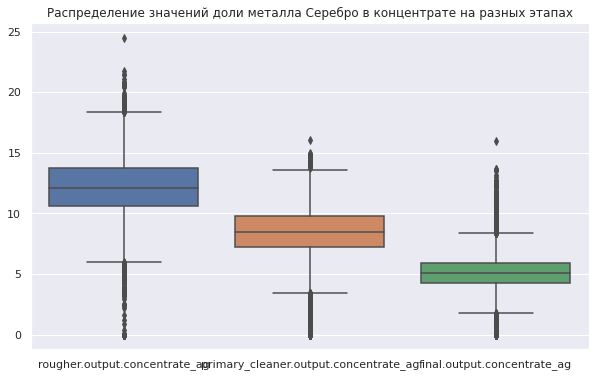

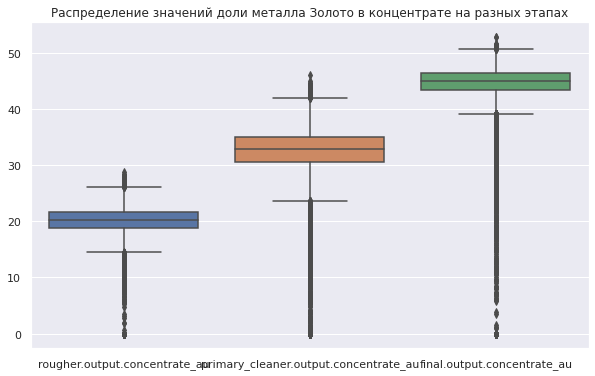

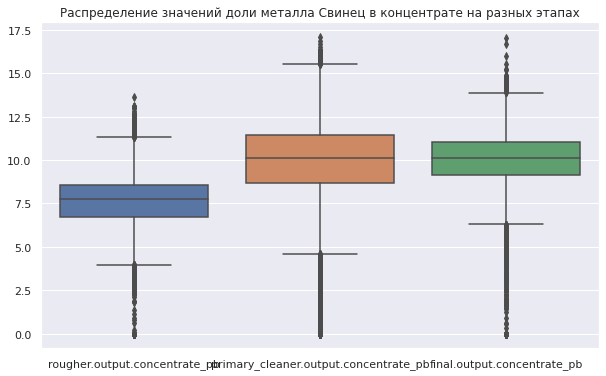

In [25]:
for key in concentrate:
    plt.figure(figsize=(10,6))
    sns.boxplot(data = df_full[concentrate[key]])
    plt.title(f'Распределение значений доли металла {key} в концентрате на разных этапах')
    
    plt.show()

Судя по графикам можно сделать вывод что доля серебра на каждом этапе равномерно сокращается, а доля золота возрастает. Доля свинца на ко второму этапу незначительно выросла, на последнем этапе практически не изменилась. 

### Сравнение распределения размеров гранул сырья

Для сравнения распределений построим график. 

<AxesSubplot:ylabel='Density'>

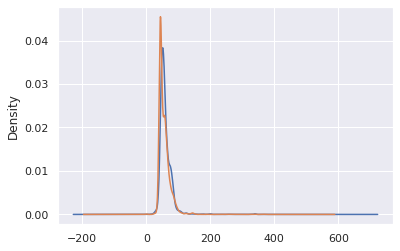

In [26]:
# можно посмотреть плотность через гистограммы.
# df_train['rougher.input.feed_size'].plot(kind='hist', bins=100, xlim=(20, 100), alpha=0.7)
# df_test['rougher.input.feed_size'].plot(kind='hist', bins=100, xlim=(20, 100), alpha=0.7)

# Но мы используем ядерную оценку плотности
df_train['rougher.input.feed_size'].plot.kde()
df_test['rougher.input.feed_size'].plot.kde()


Из графика видно, что значения показателей отличаются, но распределения весьма схожи. Значит, оценка модели будет верной.

### Суммарная концентрация всех веществ

В тренировочном датасете создадим новый столбец с суммой всех концентратов, и по новым столбцам создадим гистограмму. 

In [27]:
# столбец с данными перед обработкой
df_train['rougher.output.concentrate'] = df_train['rougher.output.concentrate_ag'] + \
    df_train['rougher.output.concentrate_pb'] + df_train['rougher.output.concentrate_sol'] + \
    df_train['rougher.output.concentrate_au']

# столбец с данными после флотации
df_train['primary_cleaner.output.concentrate'] = df_train['primary_cleaner.output.concentrate_ag'] + \
    df_train['primary_cleaner.output.concentrate_pb'] + df_train['primary_cleaner.output.concentrate_sol'] + \
    df_train['primary_cleaner.output.concentrate_au']

# солбец с данными в финальном концентрате
df_train['final.output.concentrate'] = df_train['final.output.concentrate_ag'] + \
    df_train['final.output.concentrate_pb'] + df_train['final.output.concentrate_sol'] + \
    df_train['final.output.concentrate_au']

<AxesSubplot:ylabel='Frequency'>

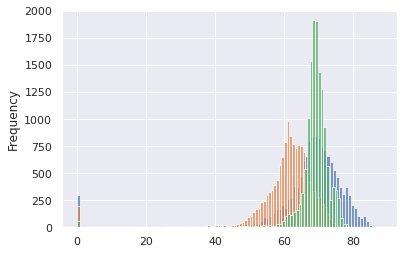

In [28]:
# строим гистограмму распределения
df_train['rougher.output.concentrate'].plot(kind='hist', bins=100, alpha=0.7)
df_train['primary_cleaner.output.concentrate'].plot(kind='hist', bins=100, alpha=0.7)
df_train['final.output.concentrate'].plot(kind='hist', bins=100, alpha=0.7)

Распределение нормальное, но есть аномальные значения, близкие к нулю. Нужно на них взглянуть поближе. 

In [29]:
print(len(df_train[df_train['rougher.output.concentrate'] < 1]))
print(len(df_train[df_train['primary_cleaner.output.concentrate'] < 1]))
print(len(df_train[df_train['final.output.concentrate'] < 1]))

302
194
59


In [30]:
df_train['rougher.output.concentrate'].sort_values().head(305)

10249    0.000000
7839     0.000000
7802     0.000000
7803     0.000000
7804     0.000000
           ...   
10936    0.040000
10940    0.040000
1929     2.016647
3872     5.577864
11009    6.829975
Name: rougher.output.concentrate, Length: 305, dtype: float64

Значений меньше еденицы очень много, затем видим резкое возрастание значений. Скорее всего данные, близкие к нулю были получены из за ошибок в работе аппаратуры. Эти данные нужно удалить, так как они могут нести недостоверную информацию. 

In [31]:
# перезапишем датасет с логической сортировкой:
df_train = df_train[df_train['rougher.output.concentrate'] > 1]
df_train = df_train[df_train['primary_cleaner.output.concentrate'] > 1]
df_train = df_train[df_train['final.output.concentrate'] > 1]

<AxesSubplot:ylabel='Frequency'>

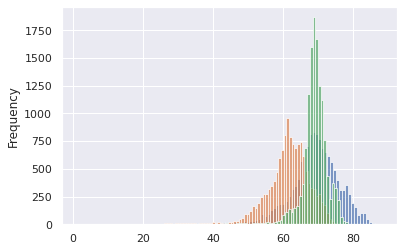

In [32]:
# проверим результат и построим гистограмму распределения
df_train['rougher.output.concentrate'].plot(kind='hist', bins=100, alpha=0.7)
df_train['primary_cleaner.output.concentrate'].plot(kind='hist', bins=100, alpha=0.7)
df_train['final.output.concentrate'].plot(kind='hist', bins=100, alpha=0.7)

От выбросов избавились.  Повторим операцию с финальным датасетом: просуммируем концентраты, и перезапишем датасет применив логическую сортировку.

In [33]:
# столбец с данными перед обработкой
df_full['rougher.output.concentrate'] = df_full['rougher.output.concentrate_ag'] + \
    df_full['rougher.output.concentrate_pb'] + df_full['rougher.output.concentrate_sol'] + \
    df_full['rougher.output.concentrate_au']

# столбец с данными после флотации
df_full['primary_cleaner.output.concentrate'] = df_full['primary_cleaner.output.concentrate_ag'] + \
    df_full['primary_cleaner.output.concentrate_pb'] + df_full['primary_cleaner.output.concentrate_sol'] + \
    df_train['primary_cleaner.output.concentrate_au']

# солбец с данными в финальном концентрате
df_full['final.output.concentrate'] = df_full['final.output.concentrate_ag'] + \
    df_full['final.output.concentrate_pb'] + df_full['final.output.concentrate_sol'] + \
    df_full['final.output.concentrate_au']

<AxesSubplot:ylabel='Frequency'>

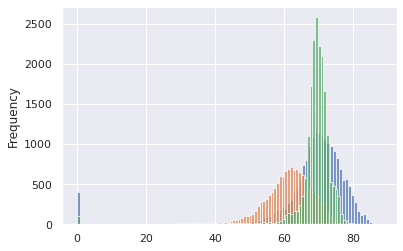

In [34]:
# строим гистограмму распределения
df_full['rougher.output.concentrate'].plot(kind='hist', bins=100, alpha=0.7)
df_full['primary_cleaner.output.concentrate'].plot(kind='hist', bins=100, alpha=0.7)
df_full['final.output.concentrate'].plot(kind='hist', bins=100, alpha=0.7)

Тоже имеем околонулевые выбросы. Их явно меньше. Посчитаем их.

In [35]:
print(len(df_full[df_full['rougher.output.concentrate'] < 1]))
print(len(df_full[df_full['primary_cleaner.output.concentrate'] < 1]))
print(len(df_full[df_full['final.output.concentrate'] < 1]))

399
0
99


Выбросы есть только в сырье и в финальном концентрате:

In [36]:
df_full['rougher.output.concentrate'].sort_values().head(402)

14515    0.000000
10403    0.000000
10402    0.000000
13473    0.000000
13479    0.000000
           ...   
16228    0.040000
16227    0.040000
1929     2.016647
3872     5.577864
16299    6.829975
Name: rougher.output.concentrate, Length: 402, dtype: float64

Схожая картина. Есть нули и есть значения 0.04, после чего данные растут. Удалим их.

In [37]:
# перезапишем датасет с логической сортировкой:
df_full = df_full[df_full['rougher.output.concentrate'] > 1]
df_full = df_full[df_full['final.output.concentrate'] > 1]

<AxesSubplot:ylabel='Frequency'>

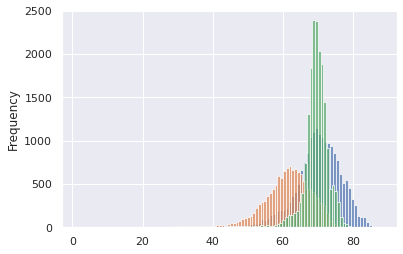

In [38]:
#проверим данные и построим гистограмму распределения
df_full['rougher.output.concentrate'].plot(kind='hist', bins=100, alpha=0.7)
df_full['primary_cleaner.output.concentrate'].plot(kind='hist', bins=100, alpha=0.7)
df_full['final.output.concentrate'].plot(kind='hist', bins=100, alpha=0.7)

От выбросов избавились, поскольку они могли быть вызваны сбоем в работе аппаратуры, или просто вызваны отсутствием материала в работе. На графике видно, что их было слишком много, чем соседних значений. Можно переходить к построению модели. 

## Модель

### Функция для подсчета sMAPE

Напишем функцию для расчета sMAPE и финального sMAPE

In [39]:
# функция для smape:
def smape (target, predictions):
    return 100/len(target) * np.sum(2 * np.abs(predictions - target) / (np.abs(target) + np.abs(predictions)))

# финальный smape
def final_smape(smape_r, smape_f):
    result = 0.25 * smape_r + 0.75 * smape_f
    return result

# создадим переменную для использования скоринга
smape_scoring = make_scorer(smape, greater_is_better=False)

Далее нам нужно разделить данные на признаки и целевой параметр и выбрать лучшие модели.

### Обучение моделей

Подготовим признаки и цели для обучающей выборки. Но сначала сравняем тренировочную и тестовую выборки. Удалим ненужные признаки из тренировочной выборки:

In [40]:
missing_cols = df_train.columns.drop(df_test.columns)
cols_to_drop = missing_cols.drop(['final.output.recovery', 'rougher.output.recovery'])
right_cols = df_train.columns.drop(cols_to_drop)
df_train = df_train[right_cols]
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13599 entries, 0 to 14148
Data columns (total 55 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   date                                        13599 non-null  object 
 1   final.output.recovery                       13599 non-null  float64
 2   primary_cleaner.input.sulfate               13599 non-null  float64
 3   primary_cleaner.input.depressant            13599 non-null  float64
 4   primary_cleaner.input.feed_size             13599 non-null  float64
 5   primary_cleaner.input.xanthate              13599 non-null  float64
 6   primary_cleaner.state.floatbank8_a_air      13599 non-null  float64
 7   primary_cleaner.state.floatbank8_a_level    13599 non-null  float64
 8   primary_cleaner.state.floatbank8_b_air      13599 non-null  float64
 9   primary_cleaner.state.floatbank8_b_level    13599 non-null  float64
 10  primary_cl

И добавим целевые параметры в тестовую:

In [41]:
target_features_to_join = df_full[['date', 'final.output.recovery', 'rougher.output.recovery']].copy()
df_test = df_test.join(target_features_to_join.set_index('date'), on='date')

А теперь непосредсвтенно разделение на признаки и цели:

In [42]:
target_rougher = df_train['rougher.output.recovery']
target_final = df_train['final.output.recovery']

features_train = df_train.drop(['date', 'final.output.recovery', 'rougher.output.recovery'], axis='columns')

Далее нам необходимо масштабировать признаки.

In [43]:
scaler = StandardScaler()
scaler.fit(features_train)
features_train = scaler.transform(features_train)

Теперь инициализируем несколько моделей и методом кросс-валидации выберем лучшую из них. Начнем с дерева решений:

In [44]:
model_tree = DecisionTreeRegressor(random_state=12345)
cvs_tree = cross_val_score(model_tree, features_train, target_rougher, scoring=smape_scoring, cv=5).mean()
cvs_tree_s = cvs_tree * -1
cvs_tree_s

9.083879568946381

Линейную регрессию:

In [45]:
model_lr = LinearRegression()
cvs_lr = cross_val_score(model_lr, features_train, target_rougher, scoring=smape_scoring, cv=5).mean()
cvs_lr_s = cvs_lr * -1
cvs_lr_s

7.282138560672938

Случайный лес:

In [46]:
model_rf = RandomForestRegressor(random_state=12345, n_estimators=10)
cvs_rf = cross_val_score(model_rf, features_train, target_rougher, scoring=smape_scoring, cv=5).mean()
cvs_rf_s = cvs_rf * -1
cvs_rf_s

6.904993512326539

Проверим еще одну модель - CatBoostRegressor

In [47]:
model_cb = CatBoostRegressor(iterations=2, learning_rate=1, depth=3)
cvs_cb = cross_val_score(model_cb, features_train, target_rougher, scoring=smape_scoring, cv=5).mean()
cvs_cb_s = cvs_cb * -1
cvs_cb_s

0:	learn: 5.5260992	total: 52.7ms	remaining: 52.7ms
1:	learn: 5.2143324	total: 57ms	remaining: 0us
0:	learn: 6.3014812	total: 4.88ms	remaining: 4.88ms
1:	learn: 5.8500316	total: 9.86ms	remaining: 0us
0:	learn: 6.5189728	total: 5.8ms	remaining: 5.8ms
1:	learn: 6.1031261	total: 10.4ms	remaining: 0us
0:	learn: 6.2910647	total: 5.27ms	remaining: 5.27ms
1:	learn: 5.8999088	total: 10.1ms	remaining: 0us
0:	learn: 6.3066412	total: 5.41ms	remaining: 5.41ms
1:	learn: 5.8364519	total: 10.5ms	remaining: 0us


7.210290613954465

Лучший вариант у случайного леса. Обучим эту модель. Но сначала необходимо подготовить признаки и целевой параметр для тествой выборки и масштабировать их

In [48]:
target_rougher_test = df_test['rougher.output.recovery']
target_final_test = df_test['final.output.recovery']

features_test = df_test.drop(['date', 'final.output.recovery', 'rougher.output.recovery'], axis='columns')

И применим новый скалер на тестовой выборке

In [49]:
scaler = StandardScaler()
scaler.fit(features_train)
features_test = scaler.transform(features_test)

Обучим модель и получим предсказания

In [59]:
model_rf = RandomForestRegressor(random_state=12345, n_estimators=10, max_depth=6)
model_rf_1 = RandomForestRegressor(random_state=12345, n_estimators=10, max_depth=6)

rf_rougher = model_rf.fit(features_train, target_rougher)
rf_final = model_rf_1.fit(features_train, target_final)


In [60]:
rf_predictions_rougher = rf_rougher.predict(features_test)
rf_predictions_final = rf_final.predict(features_test)


Найдем sMAPE и финальный sMAPE

In [61]:
smape_rougher = smape(target_rougher_test, rf_predictions_rougher)
smape_rougher

4.533317420841586

In [62]:
smape_final = smape(target_final_test, rf_predictions_final)
smape_final

7.839894517147421

In [63]:
final_smape(smape_rougher, smape_final)

7.013250243070962

Для проверки эффективности и качества модели сравним её с константной. Используем DummyRegressor

In [64]:
dummy = DummyRegressor(strategy = 'mean')
dummy_1 = DummyRegressor(strategy = 'mean')

dummy_rougher = dummy.fit(features_train, target_rougher)
dummy_predictions_rougher = dummy_rougher.predict(features_test)

dummy_final = dummy_1.fit(features_train, target_final)
dummy_predictions_final = dummy_final.predict(features_test)

In [65]:
smape_rougher_dummy = smape(target_rougher_test, dummy_predictions_rougher)
smape_rougher_dummy

5.233464103851194

In [66]:
smape_final_dummy = smape(target_final_test, dummy_predictions_final)
smape_final_dummy

8.357682158395866

In [58]:
final_smape(smape_rougher_dummy, smape_final_dummy)

7.576627644759697

## Выводы

1. Мы изучили данные. В них были небольшие недочеты, которые мы исправили на этапе предоработки - заполнили пропуски, проверили дубликаты.

2. Мы имеем три датасета, с разным количеством параметров, и имеющимися вбросами, которые, возможно, появились из-за сбоев в оборудовании. Околонулевые выбросы мы удалили.

3. Так же перед обучением модели мы удалили ненужные признаки из тренировочного набора данных, и добавили целевые признаки в тестовую.

4. Проверили несколько моделей кросс-валидацией и выбрали случайный лес, который использовали для постоения предсказаний. 

5. Нам удалось достичь лучших показателей, чем у константной модели. 

## Чек-лист готовности проекта

- [x]  Jupyter Notebook открыт
- [ ]  Весь код выполняется без ошибок
- [ ]  Ячейки с кодом расположены в порядке выполнения
- [ ]  Выполнен шаг 1: данные подготовлены
    - [ ]  Проверена формула вычисления эффективности обогащения
    - [ ]  Проанализированы признаки, недоступные в тестовой выборке
    - [ ]  Проведена предобработка данных
- [ ]  Выполнен шаг 2: данные проанализированы
    - [ ]  Исследовано изменение концентрации элементов на каждом этапе
    - [ ]  Проанализированы распределения размеров гранул на обучающей и тестовой выборках
    - [ ]  Исследованы суммарные концентрации
- [ ]  Выполнен шаг 3: построена модель прогнозирования
    - [ ]  Написана функция для вычисления итогового *sMAPE*
    - [ ]  Обучено и проверено несколько моделей
    - [ ]  Выбрана лучшая модель, её качество проверено на тестовой выборке